<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2024-2025/Examens/20250701_Repesca(Solucions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: Repesca (programació) 01/07/2025**

<hr>

**Nom:**

**NIU:**

**mail (gmail):**

<hr>

**"Instruccions d'edició del Notebook i lliurament"**

*   **<font color="darkgreen">SI VENS A FER recuperació de la segona part de programació, has de fer tot l'examen.</font>**
*   **<font color="darkblue">SI VENS A FER recuperació de la primera I segona part de l'assignatura, has de fer només l'exercici 1 d'aquest examen.</font>**
*   Obre el Notebook des de GitHub ("Open in Colab") i genera una còpia al teu Drive ("Guardar una còpia a Drive"). Editeu aquesta còpia per a l'examen.
*   Reanomena aquesta còpia utilitzant el teu NIU com a nom de fitxer: "NIU.ipynb" (*per exemple, 2055007.ipynb*).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre els comentaris/feedback sobre el teu examen) a la capçalera d'aquest Notebook.
*   Al final de l'examen, descarrega aquest Notebook en format .ipynb i l'has de pujar a la següent *drop folder*: [Link](https://cern.ch/examendf2025). Assegura't que el fitxer té el nom correcte.
*   Podeu tornar a pujar el fitxer si creieu que hi ha un error, però només considerarem l'última versió, i dins de l'horari establert.
*   **NOTA:** Abans d'entregar o donar per finalitzat cada exercici, és recomanable reiniciar l'entorn d'execució per veure que s'executa tot de manera correcta: "Entorn d'execució >> Reiniciar entorn d'execució", i després "Entorn d'execució >> Executar-ho tot".

<hr>

**Instruccions de l'examen**

*   L'examen es realitza de forma individual.
*   L'horari és de 9h a 12h. No s'acceptaran entregues passada aquesta hora.
*   Podeu consultar apunts, entregues o utilitzar internet per buscar informació, però **NO** comunicar-vos entre vosaltres/es, ni utilitzar ChatGPT, ni ajuda IA Google Colab, ni Whatsapp, ni missatgeria... Revisarem durant l'examen que no tingueu finestres obertes amb aquestes aplicacions.
*    **NOTA:** Tenim una eina per comparar Notebooks aplicant IA. Si hi ha còpies flagrants, obtindreu un cero, i us cridarem a revisió personalitzada.

<hr>

## **EXAMEN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<hr>

<font color='green'>**> Exercici #1 [5 punts]**</font>


En aquest problema aplicarem el concepte de [regressió lineal simple](https://realpython.com/linear-regression-in-python/#simple-linear-regression) per ajustar una sèrie de punts a la corba descrita per:

$$
f(x) = A_0 \cdot x^2 \cdot \cos(x+\theta_0)
$$

és a dir, que avaluarem els paràmetres $A_0$ i $\theta_0$ que millor s'ajustin als punts que proporcionem, basant-nos en un mètode de [minimització de la suma dels residuals al quadrat](https://realpython.com/linear-regression-in-python/#problem-formulation) (SSR). Els residuals no són més que la diferència al quadrat entre els valors $y_i$ de la nostra mostra i els valors de la funció de test avaluada en els $x_i$. Recorda que tenim uns parells de n-punts $(x_i, y_i)$. La funció de test que millor s’ajusti serà aquella que minimitzi aquestes distàncies (similar al mètode de Kolmogórov que hem vist a classe...). Som-hi!

In [ ]:
# Els parells de punts a considerar son:

xr = [0.12, 0.94, 2.02, 3.05, 3.8, 4.92, 6.06, 7.03, 8.1, 9.05, 10.14, 11.01, 12.13, 12.88, 14.08, 15.13]
yr = [-1.96, 1.75, -1.67, -3.03, -0.95, 3.51, 7.55, 4.65, -11.46, -17.49, -9.52, 12.49, 28.55, 18.84, -16.27, -47.02]

**1.1 [0.5 punts]:** Fes una gràfica dels punts ($x_r$, $y_r$).


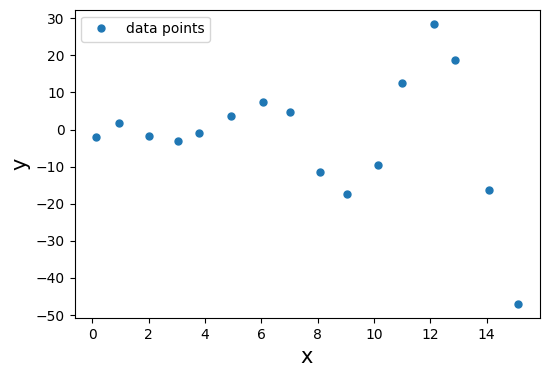

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(xr,yr,'.',markersize=10,label='data points')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.legend(loc='best')
plt.show()

**1.2 [0.5 punts]:** Defineix una funció que prengui com a paràmetres un valor de $A$, un valor de $\theta$ i els punts ($x_r$, $y_r$), i que ens retorni la suma dels residuals al quadrat (SSR). Imprimeix per pantalla el valor del residual per a $A = 0.5$ i $\theta = 0.5$.

In [ ]:
def get_ssr(A,theta,x,y):
  ftest = lambda x: A*np.cos(x+theta)*(np.power(x,2))
  d = ftest(x)
  ssr=0
  for e in range(0,len(d)):
    ssr+=(d[e]-y[e])**2
  return float(ssr)

print("SRR =", get_ssr(np.float64(0.5),np.float64(0.5),xr,yr))

SRR =  9821.758259358197


**1.3 [1.5 punts]:** Considera 500 punts de test entre 0 i 1, tant per al paràmetre $A$ com per a $\theta$. Farem servir aquests punts per avaluar els SSR i així buscar per a quin valor dels paràmetres $A$ i $\theta$ obtenim el mínim del SSR. Aquests seran els valors òptims $A_0$ i $\theta_0$ que millor s’ajusten als nostres punts.

Fent servir aquest mètode, calcula els valors òptims de $A_0$ i $\theta_0$. Imprimeix els valors per pantalla.

In [ ]:
t = np.linspace(0,1,500)
a = np.linspace(0,1,500)

d2lim=1e5 # Definimos unos valores óptimos fuera del rango, porque los modificaremos

for ti in t:
  for ai in a:
    d2=get_ssr(ai,ti,xr,yr)
    if (d2 < d2lim):
      t_op = ti
      a_op = ai
      d2lim = d2

print("A_0:",a_op, "- T_0:", t_op)

A_0: 0.2004008016032064 - T_0: 0.5170340681362725


**1.4 [1.5 puntos]:** Defineix una malla de 500 punts de test entre 0 i 1, tant per al paràmetre $A$ com per a $\theta$. Farem servir aquesta malla de punts per avaluar els SSR i així buscar per a quin valor dels paràmetres $A$ i $\theta$ obtenim el mínim del SSR. Aquests seran els valors òptims $A_0$ i $\theta_0$ que millor s'ajusten als nostres punts.

Fes un escaneig, troba el punt òptim, determina i mostra per pantalla $A_0$ i $\theta_0$, i fes una [gràfica de tipus contour](https://www.adeveloperdiary.com/data-science/how-to-visualize-gradient-descent-using-contour-plot-in-python/) que mostri tots els resultats sobre el pla $(A,\theta)$. Allà es veurà on es troba el mínim del SSR.

Podem fer servir $np.meshgrid per definir la malla:

```
t = np.linspace(0,1,500)
a = np.linspace(0,1,500)
X, Y = np.meshgrid(a, t)
```

Després hauràs d'avaluar els SSR, però compte: haurà de ser una llista de llistes (igual que el meshgrid) per tal de poder fer després la gràfica de tipus contour, que tindrà un aspecte similar a:

```
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 100 ,locator=ticker.LogLocator())
plt.colorbar()
plt.show()
```

Dibuixa a sobre un punt on es trobin els valors òptims.

**ET DEIXO UN EXEMPLE PERQUÈ VEGIS COM ES FA, després ho has d'aplicar tú mateix al problema de l'examen**

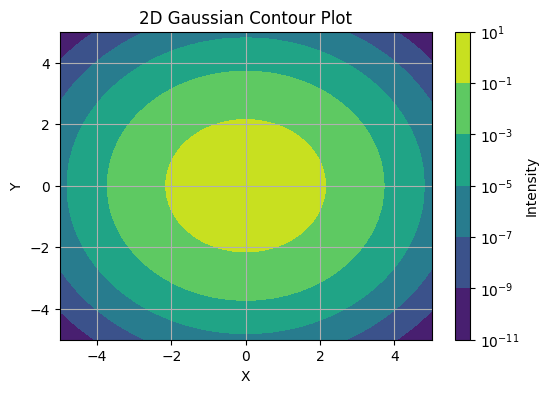

In [ ]:
# Exemple de plot emprant contourf:

from matplotlib import ticker, cm

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Define a 2D Gaussian function
sigma = 1.0
Z = np.exp(-((X**2 + Y**2) / (2 * sigma**2)))

# Plot the contour
plt.figure(figsize=(6,4))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis',locator=ticker.LogLocator())
plt.colorbar(contour, label='Intensity')
plt.title('2D Gaussian Contour Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

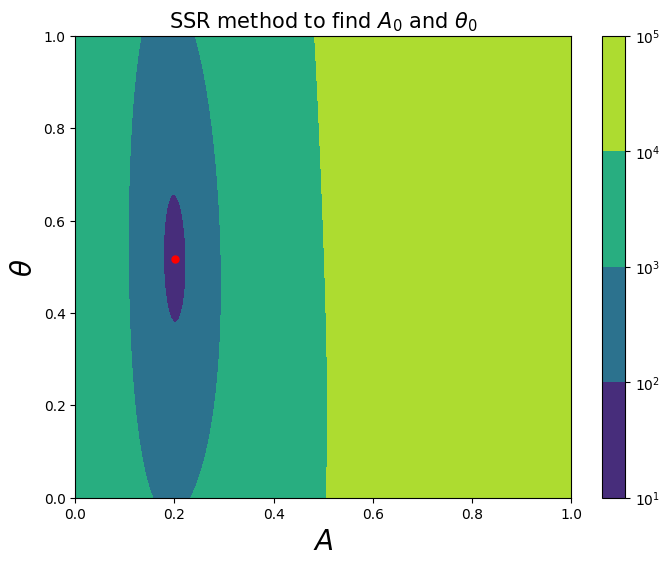

A_0: 0.2004008016032064 - T_0: 0.5170340681362725


In [ ]:
from matplotlib import ticker, cm

t = np.linspace(0,1,500)
a = np.linspace(0,1,500)

d2lim=1e5

X, Y = np.meshgrid(a, t)

Z = []
for ti in t:
  z=[]
  for ai in a:
    d2=get_ssr(ai,ti,xr,yr)
    z.append(d2)
    if (d2 < d2lim):
      tm = ti
      am = ai
      d2lim = d2
  Z.append(z)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 100 ,locator=ticker.LogLocator())
plt.colorbar()
plt.title(r"SSR method to find $A_0$ and $\theta_0$",size=15)
plt.xlabel(r"$A$",size=20)
plt.ylabel(r"$\theta$",size=20)
x=[am] # J. Flix
y=[tm] # J. Flix
plt.plot(x,y,'r.',markersize=10) # J. Flix: mostrar el mínimo en la gráfica
plt.show()

print("A_0:",am, "- T_0:", tm)

**1.5 [1 punt]:** Fes una gràfica dels parells de punts ($x_r$, $y_r$) i dibuixa també la corba que millor s'ajusta als punts, és a dir, $f(x) = A_0 \cdot x^2 \cdot \cos(x+\theta_0)$, amb els valors de $A_0$ i $\theta_0$ obtinguts a l'apartat 1.3 o 1.4.



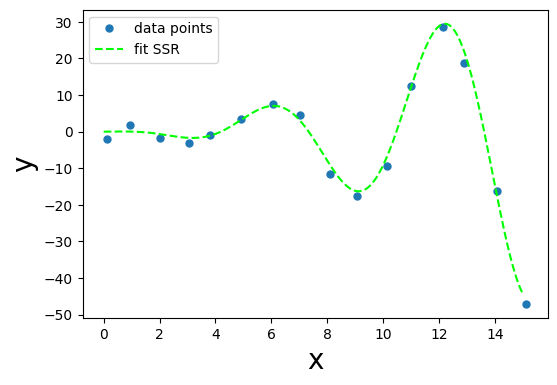

In [ ]:
ftest = lambda x: am*np.cos(x+tm)*np.power(x,2)

xp = np.linspace(0,15,1000)
yp = ftest(xp)

plt.figure(figsize=(6,4))
plt.plot(xr,yr,'.',markersize=10,label='data points')
plt.plot(xp,yp,'--',label='fit SSR', color="lime")
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)
plt.legend(loc='best')
plt.show()

<hr>

<font color='green'>**> Exercici #2 [5 punts]**</font>

**> Context:**

Un *Continuous Time Random Walk* (CTRW) és un model estocàstic utilitzat per descriure dinàmiques de partícules que realitzen salts espacials separats per temps d'espera aleatoris. A diferència dels *random walks* clàssics a temps discret, en un CTRW el temps entre passos també és una variable aleatòria, sovint modelada amb una distribució de tipus *heavy-tailed* com la de Pareto.

Aquest tipus de processos són útils per descriure transport anòmal en sistemes físics, biològics i econòmics, i poden mostrar comportaments molt diferents dels processos difusius clàssics.

En aquest exercici analitzarem un CTRW en una dimensió, on:

- Els temps d'espera $ \tau $ segueixen una distribució de Pareto amb paràmetres $\alpha$ i $\tau_0$:

  $$P(\tau) = \frac{\alpha \tau_0^\alpha}{\tau^{\alpha+1}}, \quad \tau \geq \tau_0$$

- Els passos espacials $\Delta x$ segueixen una distribució normal centrada: $ \Delta x \sim \mathcal{N}(0, \sigma^2) $

En el nostre cas:

* $\alpha=1.75$
* $\tau_0=1.0$
* $\sigma=0.1$

**2.1 [1.5 punts]:** Simulació d'un camí CTRW - Implementa una funció que simuli un **Continuous Time Random Walk (CTRW)** en una dimensió on la partícula començi en una posició inicial $ x_0 = 0$ i a un temps inicial $t_0 = 0$ fins a un temps màxim $t_{\text{max}} = 1000$. Fes una gràfica que contingui 4 trajectòries d'aquest moviment.

### Implementació de la dinàmica del CTRW

1) **Temps d'espera**: Genera pel temps d'espera un temps aleatori $ \tau $, obtingut d'una distribució de Pareto amb paràmetres $ \alpha $ i $ \tau_0 $. Pots generar valors de $ \tau $ amb la següent transformació d'una variable uniforme $ u \in (0,1) $:

   $$
   \tau = \frac{\tau_0}{(1 - u)^{1/\alpha}}
   $$

o bé amb la funció de scipy.stats $ss.pareto.rvs(alpha, loc=0, scale=tau0, size=N)$.

2) **Desplaçament**: Genera una longitud de pas aleatori $ \Delta x $ segons una distribució normal centrada:

   $$
   \Delta x \sim \mathcal{N}(0, \sigma^2)
   $$

pots utilitzar la funció de numpy:

```
np.random.normal(0, sigma)
```

3) **Actualització**: El temps actual $ t $ s'actualitza sumant-hi $ \tau $, i la posició $ x $ s'actualitza sumant-hi $ \Delta x $.


4) **Condició d'aturada**: El procés es repeteix fins que $ t \geq t_{\text{max}} $.  

És important **tractar correctament l'últim pas**, és a dir:

   - Si el **proper temps d'espera** fa que $ t + \tau > t_{\text{max}} $, **no s'ha de fer el desplaçament**.
   - En aquest cas, s'ha d'afegir un **punt final a $ t_{\text{max}} $** amb la **mateixa posició** que abans del pas.
   - Això assegura que la trajectòria arriba exactament a $ t_{\text{max}} $, però sense fer un pas "fora de temps".

**Requeriments de la funció:** La teva funció ha de tenir la següent forma:

```python
def simulate_CTRW_1D_tmax(tmax, alpha, tau0, sigma, x0=0, t0=0):
```

i ha de retornar:

* Un array (llista) amb les posicions
* Un array (llista) amb els temps
* Un comptador de quants de passos s'han fet en total

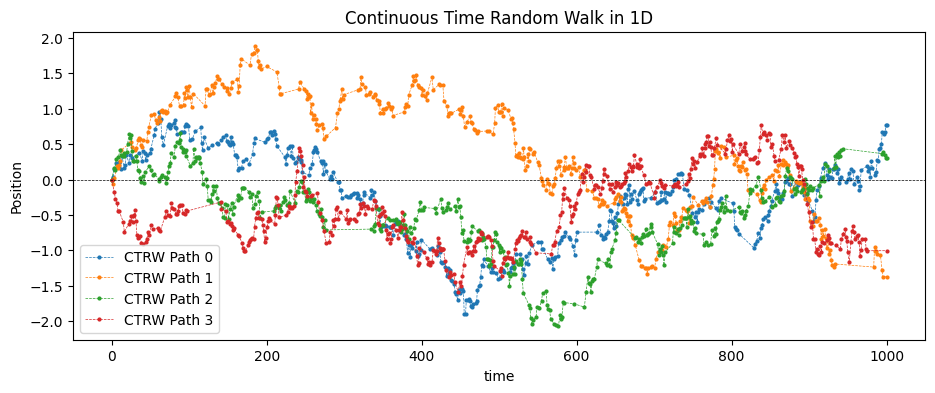

In [ ]:
import scipy.stats as ss

def simulate_CTRW_1D_tmax(tmax, alpha, tau0, sigma, x0=0, t0=0):
    t = t0
    x = x0
    vts = [t0]
    vxs = [x0]
    nsteps = 0
    while t < tmax:
        u = np.random.uniform(0, 1)
        waiting_time = tau0/((1-u)**(1.0/alpha))
#        waiting_time = ss.pareto.rvs(alpha, loc=0, scale=tau0) # <- Aquest també val
        if t + waiting_time >=  tmax:
            t = tmax
            vxs.append(x)
            vts.append(tmax)
            break
        t += waiting_time
        step_size = np.random.normal(0, sigma)
        x += step_size
        nsteps += 1
        vxs.append(x)
        vts.append(t)
    return vxs, vts, nsteps

tmax = 1000
alpha = 1.75
tau0 = 1
sigma = 0.1
x0 = 0
t0 = 0

plt.figure(figsize=(11, 4))
for i in range(4):
    positions, times, nsteps = simulate_CTRW_1D_tmax(tmax, alpha, tau0, sigma)
    plt.plot(times,positions,"o--", label= f'CTRW Path {i}',markersize=2, lw=0.5)
plt.title('Continuous Time Random Walk in 1D')
plt.xlabel('time')
plt.ylabel('Position')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.show()

**2.2 [1.5 punts]:** Distribució de posicions finals i nombre de passos -  Utilitza la funció de l'Exercici 2.1 per simular $ M = 5000 $ trajectòries independents per a diversos valors de $ t_{\text{max}} \in \{50, 100, 500, 1000\} $.

Per a cada simulació, guarda en una llista:

- La posició final de la partícula.
- El nombre total de passos realitzats fins a $ t_{\text{max}} $.

Al final hauries de tenir, per a cada temps, una llista amb $M$ posicions finals i $M$ nombre de passos realitzats.

In [ ]:
M = 5000
tfin = np.array([50,100,500,1000])
final_positions = []
lengths = []
for tmax in tfin:
    print(f"Simulating for tmax = {tmax}")
    final_positions.append([])
    lengths.append([])
    for j in range(M):
        positions, times, nsteps = simulate_CTRW_1D_tmax(tmax, alpha, tau0, sigma)
        final_positions[-1].append(positions[-1])
        lengths[-1].append(nsteps)
    final_positions[-1] = np.array(final_positions[-1])
    lengths[-1] = np.array(lengths[-1])

Simulating for tmax = 50
Simulating for tmax = 100
Simulating for tmax = 500
Simulating for tmax = 1000


**2.3 [1 punt]:** Posició de les partícules - Se sap que per temps llargs i desplaçaments petits, la PDF de la posició del **CTRW** a un temps $t$ donat és:

$$
P(x,t) = \frac{1}{\sqrt{4\pi Dt}}e^{-\frac{x^2}{4Dt}}, \quad \mathrm{amb} \quad D = \frac{1}{2}\frac{\sigma^2}{\mu},  \quad \mathrm{i} \quad \mu = \frac{\alpha \tau_0}{\alpha - 1}
$$

Per cada valor de $ t_{\text{max}} $, fes una gràfica de:

- L'histograma de les posicions finals (normalitzat com a densitat de probabilitat).
- La corba de la distribució normal centrada amb variància $ 2Dt $. Pots utilitzar la funció

```python
scipy.stats.norm.pdf(), amb loc=0, i scale=np.sqrt(2*D*t)
```

Compara visualment la distribució empírica amb l'ajust gaussià.

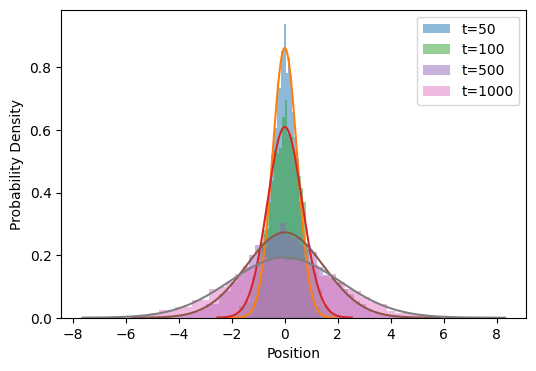

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(6,4))

D = sigma**2/(alpha*tau0/(alpha-1))*0.5
for idx in range(len(tfin)):
    t = tfin[idx]
    plt.hist(final_positions[idx], bins=50, density=True, alpha=0.5, label=f't={t}')
    xx = np.linspace(np.min(final_positions[idx]), np.max(final_positions[idx]), 1000)
    # pdf = (1/(np.sqrt(4*np.pi*D*t)))*np.exp(-xx**2/(4*D*t))
    pdf = norm.pdf(xx, loc=0, scale=np.sqrt(2*D*t))
    plt.plot(xx, pdf,)
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**2.4 [1 punt]:** Convergència del nombre mitjà de passos - Teòricament, el nombre mitjà de passos fins a $ t_{\text{max}} $ per a temps llargs és:

$$
\langle N(t) \rangle \approx \frac{t}{\mu}
$$

On $ \mu = \frac{\alpha \tau_0}{\alpha - 1} $ és el valor esperat del temps d'espera (si $ \alpha > 1 $).

Per cada valor de $t_{\text{max}}$, calcula el nombre mitjà de passos observats i representa l'**error relatiu** en percentatge respecte al valor teòric. Afegeix una línia horitzontal al 1% per valorar la precisió de la convergència, i digues a partir de quin valor de $t_{max}$ aquest resultat se compleix amb un error menor de l'1%.

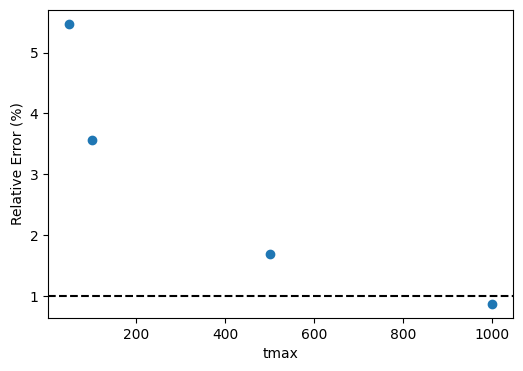

In [ ]:
mu = (alpha*tau0/(alpha-1))
ls = np.array([np.mean(l) for l in lengths])

plt.figure(figsize=(6,4))
plt.scatter(tfin, 100*np.abs(ls/tfin - (1/mu))/ (1/mu))
plt.xlabel('tmax')
plt.ylabel('Relative Error (%)')
plt.axhline(1,linestyle='--', color='k')
plt.show()